# Task-1

In [ ]:
from sklearn import preprocessing
from sklearn import tree

In [ ]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
le = preprocessing.LabelEncoder()

Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outlook mapping: ",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping: ",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outlook mapping:  {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping:  {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}
Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
import numpy as np
import torch

inputs = []
outputs = []

for i in range(len(Play_encoded)):
  temp = [Outlook_encoded[i], Temperature_encoded[i], Humidity_encoded[i], Wind_encoded[i]]
  outputs.append(Play_encoded[i])
  inputs.append(temp)

inputs = np.array(inputs)
print(inputs)
print(outputs)

[[1 1 0 0]
 [1 1 0 1]
 [0 1 0 0]
 [2 2 0 0]
 [2 0 1 0]
 [2 0 1 1]
 [0 0 1 1]
 [1 2 0 0]
 [1 0 1 0]
 [2 2 1 0]
 [1 2 1 1]
 [0 2 0 1]
 [0 1 1 0]
 [2 2 0 1]]
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
from sklearn.model_selection import train_test_split

data_feature_names = ['Outlook','Temperature','Humidity', 'Wind']

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs,test_size = 0.2,random_state=2) #Random state is last two digits of my id

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train, y_train)

from sklearn import metrics

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 score:",metrics.f1_score(y_test,y_pred))

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=2)
clf = clf.fit(X_train, y_train)

from sklearn import metrics

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 1.0
F1 score: 0.8


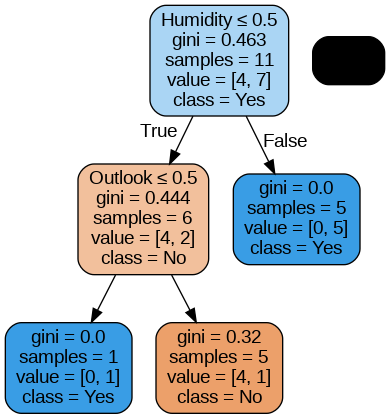

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Outlook','Temperature','Humidity', 'Wind'],class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('weather.png')
Image(graph.create_png())

###Q1 What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’? 

In [ ]:
prediction = clf.predict([[1,2,1,0]])
print("Prediction", prediction and 'Yes\n' or 'No\n')


Prediction Yes



###Q2 What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

In [ ]:
prediction = clf.predict([[2,0,0,1]])
print("prediction: ", prediction and 'Yes' or 'No')

prediction:  No


# Iris Dataset

alphas:  [0.         0.31578947 0.34865497]

For Training Data



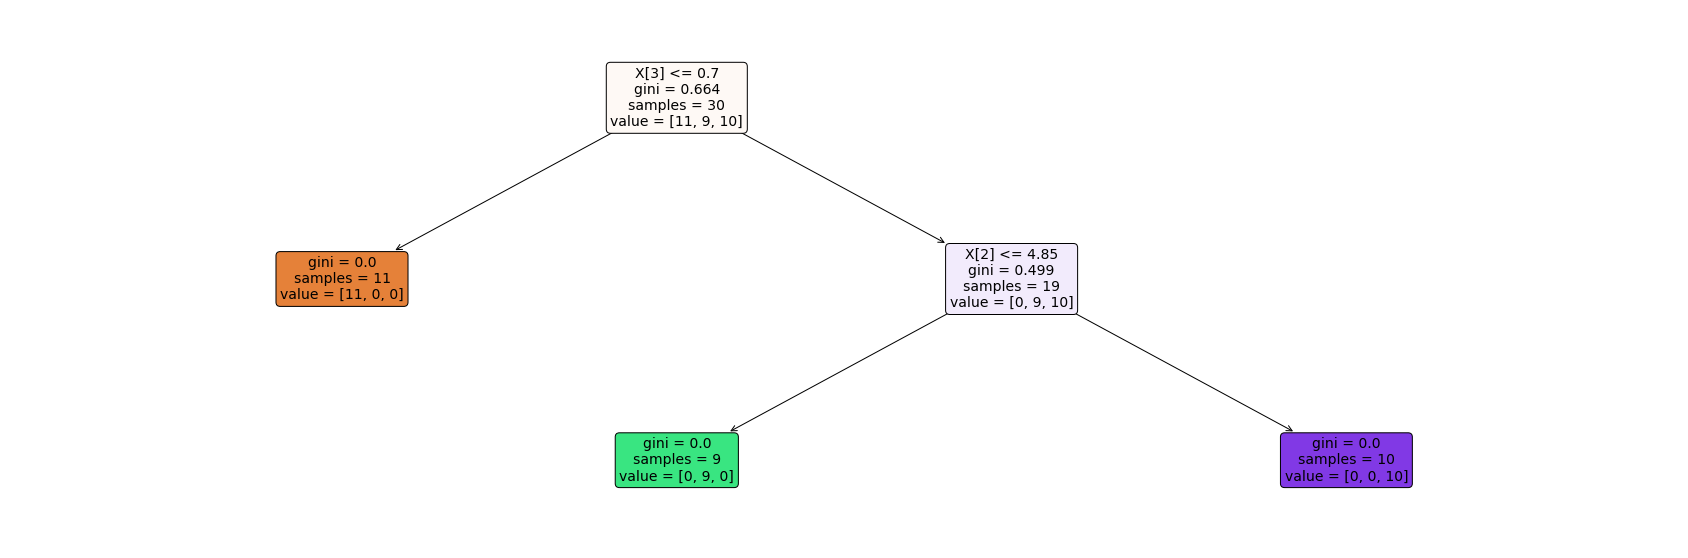

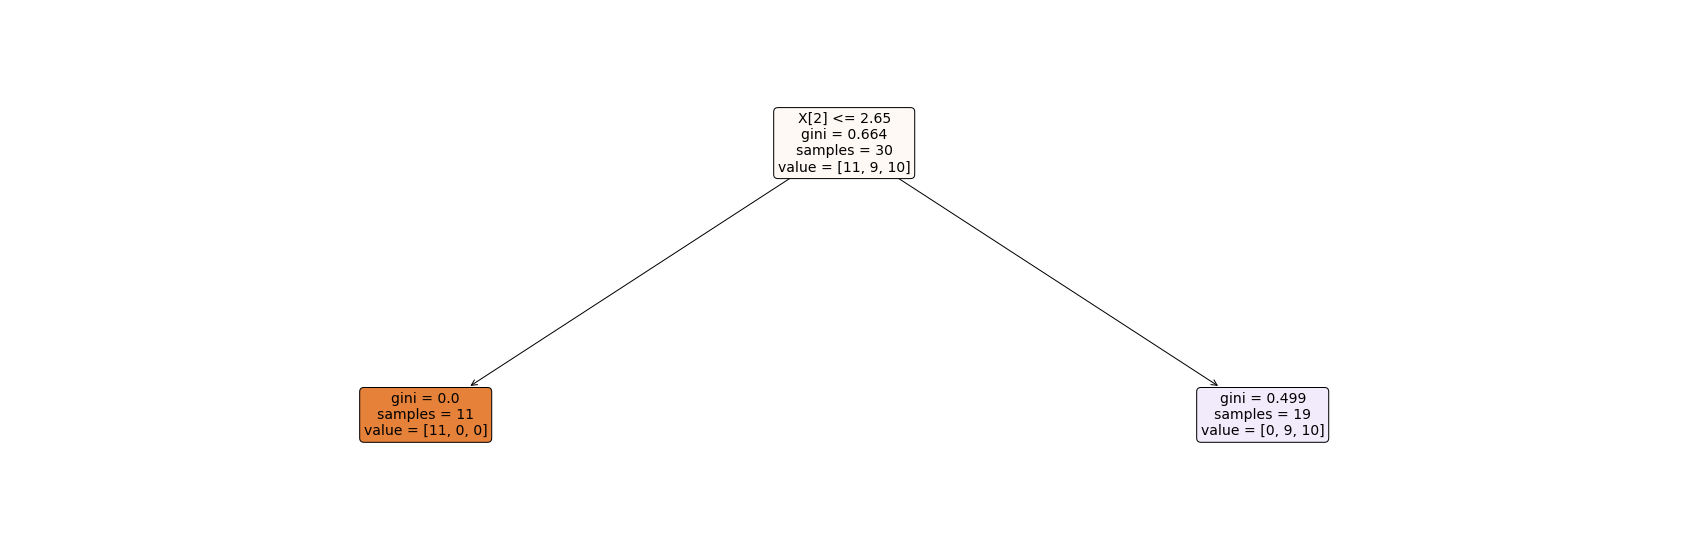

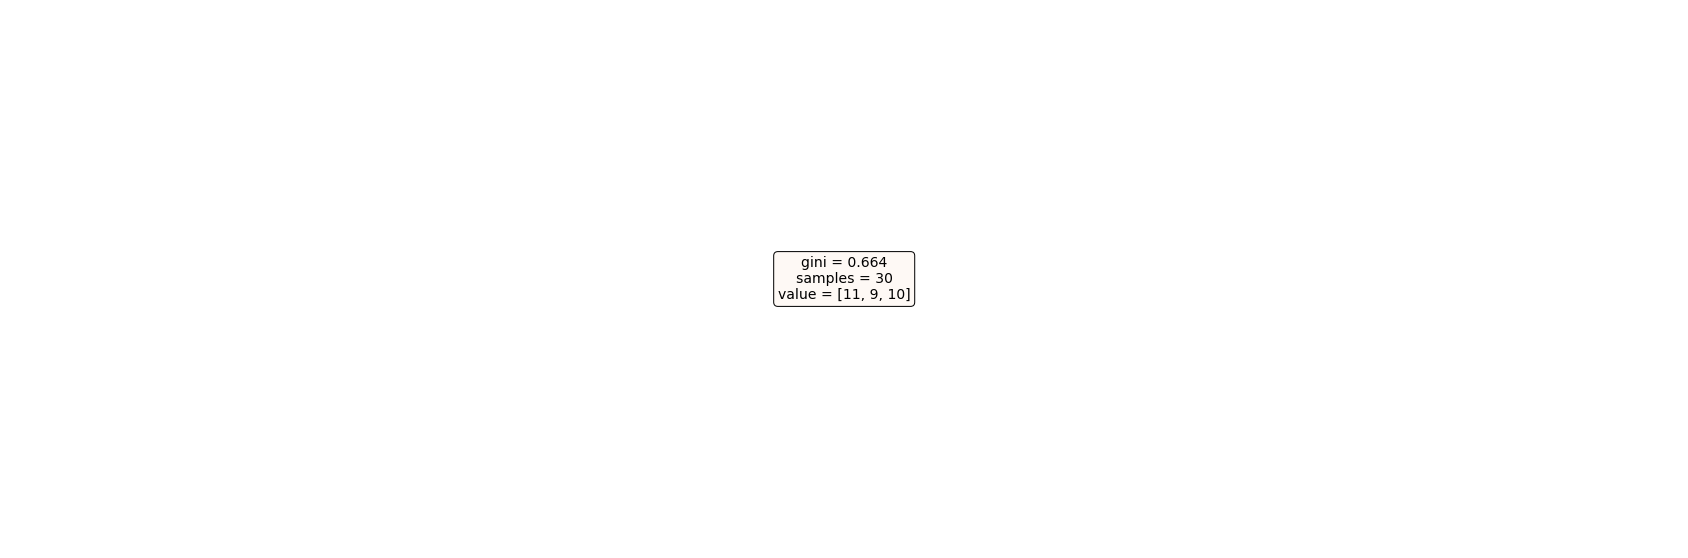


For Test Data



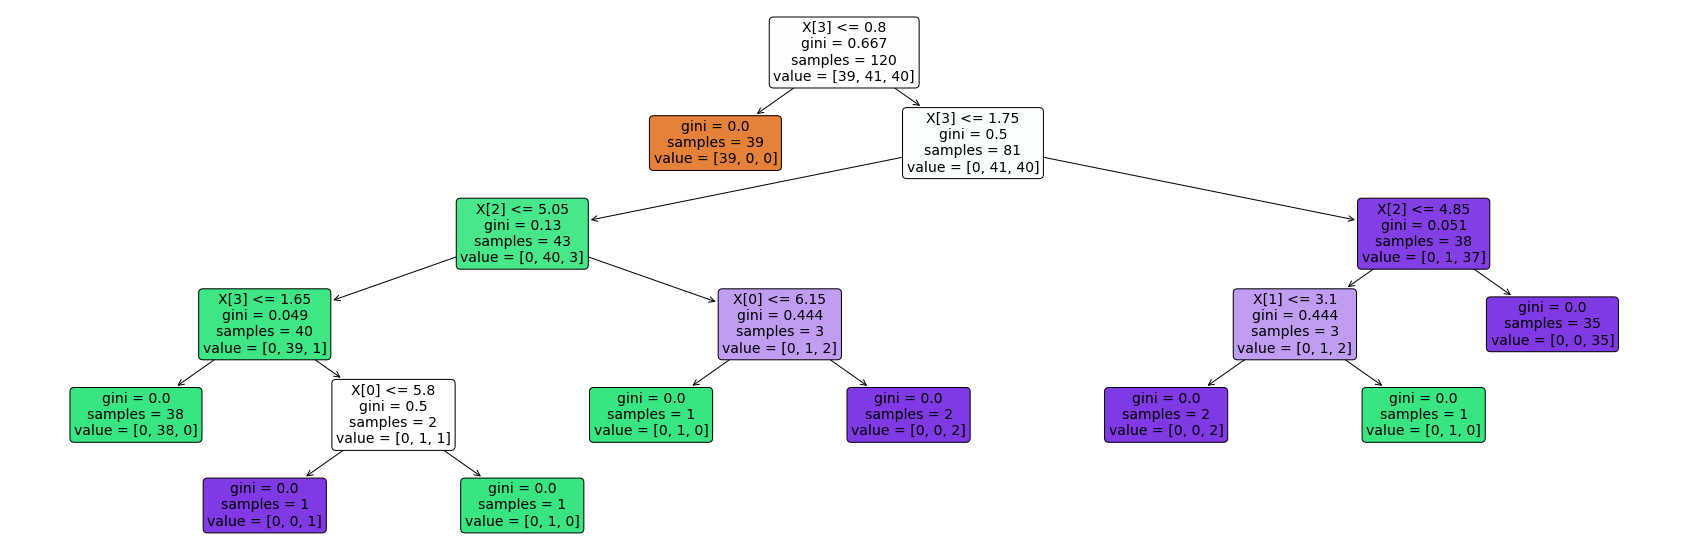

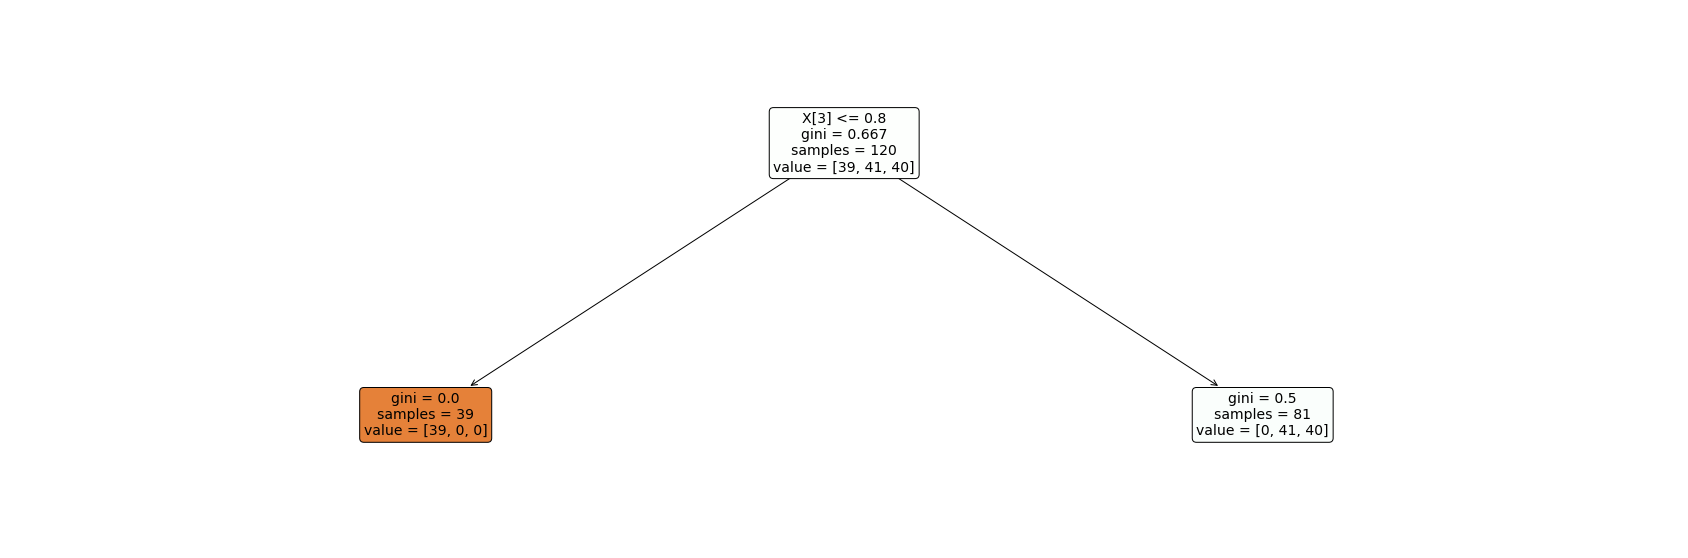

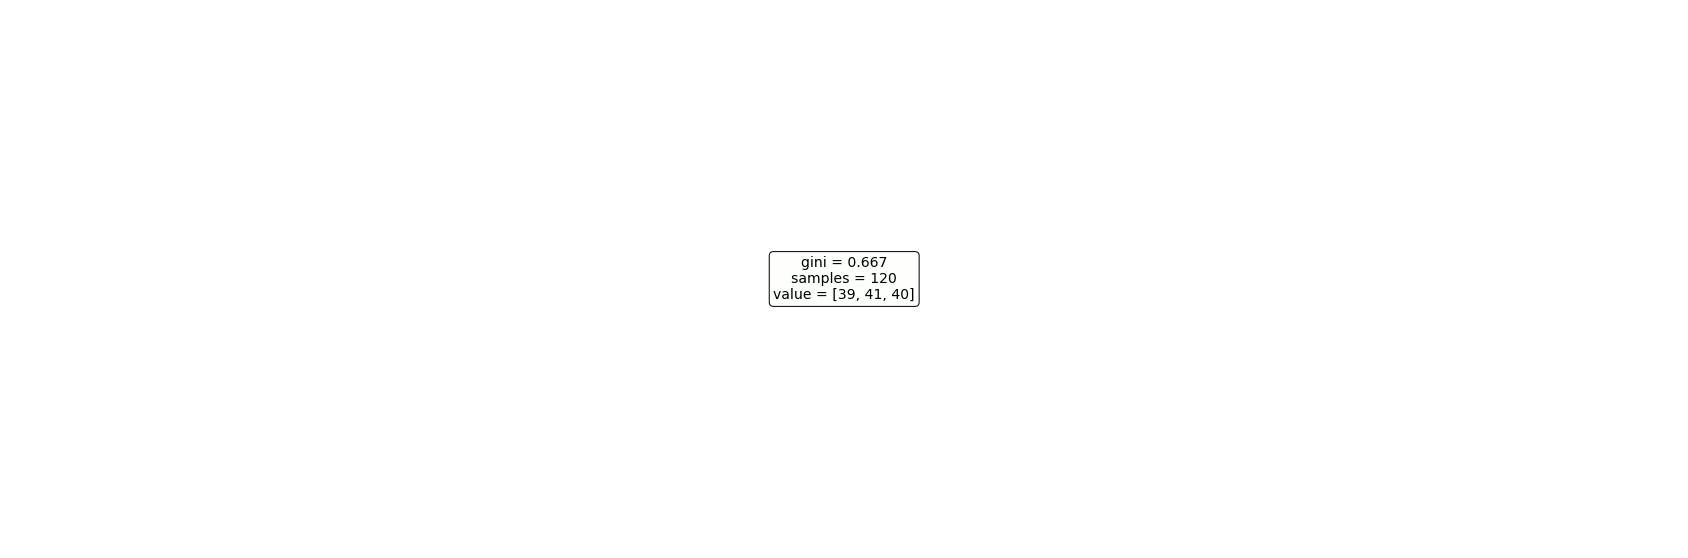

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

from sklearn.datasets import load_iris

_feature, _label = load_iris(return_X_y=True)
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(_feature, _label, test_size = 0.8, random_state=30)

data = load_iris()

features = np.array(data.data)
labels = np.array(data.target)

model = DecisionTreeClassifier()

path = model.cost_complexity_pruning_path(trainFeatures, trainLabels)
alphas = path.ccp_alphas
print("alphas: ",alphas)
print("\nFor Training Data\n")
models = []
for alpha in alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha)
  model.fit(trainFeatures, trainLabels)
  models.append(model)

  plt.figure(figsize=(30,10))
  a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)
  plt.show()

print("\nFor Test Data\n")
models = []
for alpha in alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha)
  model.fit(testFeatures, testLabels)
  models.append(model)

  plt.figure(figsize=(30,10))
  a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)
  plt.show()

# Tast:2

In [ ]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
digits = load_digits()
# print the names of the  features
print("Features:",digits.feature_names)
# print the label type of Digits dataset
print("Labels:",digits.target_names)

Features: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target , test_size=0.2, random_state=30)

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 30, max_leaf_nodes=30)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[1 9 6 5 3 2 3 2 1 2 5 3 1 2 8 1 5 1 8 1 1 0 1 0 3 5 5 1 0 5 2 5 1 7 5 1 3
 2 9 4 9 0 5 3 1 6 9 6 0 9 4 9 4 4 4 2 6 2 5 4 8 6 9 6 9 7 3 1 4 1 4 8 0 1
 6 1 6 2 0 7 8 5 9 2 7 6 9 2 8 5 5 8 8 0 1 2 5 4 1 2 7 8 6 8 9 0 6 0 8 0 3
 1 5 3 0 1 4 6 7 2 0 9 1 2 3 6 8 8 8 1 5 0 2 4 0 6 4 4 1 1 1 7 9 4 0 4 3 6
 7 2 6 1 6 6 7 2 6 3 4 0 9 7 2 2 0 4 4 7 6 8 5 6 0 1 1 1 4 8 8 6 5 9 0 2 7
 3 6 2 2 8 7 4 0 8 5 1 1 7 6 9 5 3 2 1 9 9 3 4 4 1 0 2 7 1 1 4 8 7 3 7 0 6
 1 8 3 1 3 5 7 1 1 0 3 6 8 9 0 9 6 3 2 0 4 2 1 7 1 4 8 0 6 6 7 2 2 8 6 9 6
 6 9 1 8 9 1 1 8 9 6 8 5 6 4 0 2 4 3 2 1 1 7 7 0 5 5 2 5 8 8 4 6 9 9 2 6 4
 5 7 1 0 8 6 6 9 6 1 1 4 7 0 0 5 3 3 5 8 6 8 4 1 9 8 2 5 8 7 1 6 0 0 7 0 6
 8 0 5 6 9 6 5 0 0 2 1 1 7 6 9 5 1 2 4 9 2 1 1 6 8 1 6]


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.8333333333333334
precision: [0.89473684 0.68421053 0.94594595 0.82608696 0.84375    0.9375
 0.89361702 0.96296296 0.63888889 0.80645161]
recall: [0.97142857 0.84782609 0.85365854 0.73076923 0.77142857 0.78947368
 1.         0.8125     0.65714286 0.83333333]
